### Steps
0. Preprocess + EDA + Feature Selection
1. Extract input and output cols
2. Scale the vaues
3. Train the spilt
4. Train the model
5. Evaluate the model/model selection
6. Deploy the model


In [ ]:
#import necessary libraries
import numpy as np
import pandas as pd

In [39]:
df = pd.read_csv('/content/placement-dataset.csv')

In [40]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [41]:
# Show the details of the datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [42]:
df.shape

(100, 4)

0. Preprocess
that handle unnecessary column.

In [43]:
df = df.iloc[:,1:]

In [44]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


 EDA it's normally show how data look like but not exactly.

In [45]:
import matplotlib.pyplot as plt

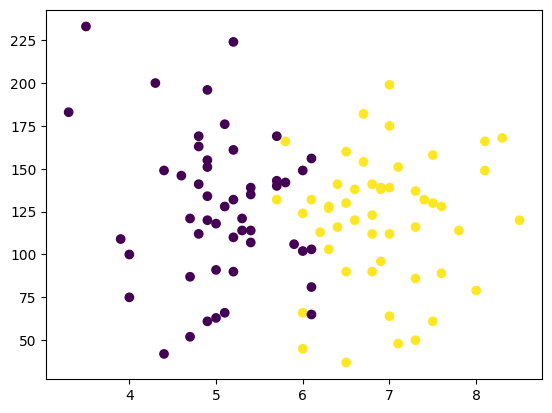

In [46]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In this section, Feature selection is skip now...

1. Extract input and output cols

In [49]:
# Take all independent input at X and output at y
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [50]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [51]:
y.shape

(100,)

2. Train the spilt

In [53]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [55]:
X_train,y_train

(    cgpa     iq
 42   7.6   89.0
 49   5.4  135.0
 30   7.6  128.0
 41   5.4  114.0
 55   7.8  114.0
 ..   ...    ...
 0    6.8  123.0
 51   4.8  141.0
 8    6.1  156.0
 54   6.4  141.0
 24   4.7  121.0
 
 [90 rows x 2 columns],
 42    1
 49    0
 30    1
 41    0
 55    1
      ..
 0     1
 51    0
 8     0
 54    1
 24    0
 Name: placement, Length: 90, dtype: int64)

3. Scale the vaues

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
scaler=StandardScaler()

In [58]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [59]:
X_train,X_test

(array([[ 1.40587447, -0.89807879],
        [-0.54208316,  0.30284052],
        [ 1.40587447,  0.12009193],
        [-0.54208316, -0.24540525],
        [ 1.58296153, -0.24540525],
        [ 0.07772154, -0.53258161],
        [ 0.2548086 , -0.53258161],
        [-0.09936552, -0.45426078],
        [ 1.84859212,  0.66833771],
        [ 0.96315683, -1.9684634 ],
        [ 0.78606977,  0.40726829],
        [ 2.20276623, -0.0887636 ],
        [ 0.69752624, -0.29761913],
        [ 2.02567917,  1.1643696 ],
        [ 0.43189566,  0.17230581],
        [ 1.31733094,  0.17230581],
        [ 0.96315683,  0.72055159],
        [-0.80771375,  1.37322513],
        [ 1.22878742,  0.2245197 ],
        [ 0.43189566,  0.95551406],
        [ 1.14024389, -1.91624952],
        [ 0.69752624, -0.87197185],
        [-0.18790904,  1.11215571],
        [ 1.31733094,  0.90330018],
        [ 0.78606977,  0.38116135],
        [ 0.07772154,  0.2245197 ],
        [-0.9848008 , -0.0887636 ],
        [ 1.31733094, -1.629

4. Train the model

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
clf = LogisticRegression()

In [62]:
# model training
clf.fit(X_train,y_train)

LogisticRegression()

5. Evaluate the model/model selection

In [64]:
y_pred=clf.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score

In [66]:
accuracy_score(y_test,y_pred)

0.9

6. Deploy the model

In [68]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

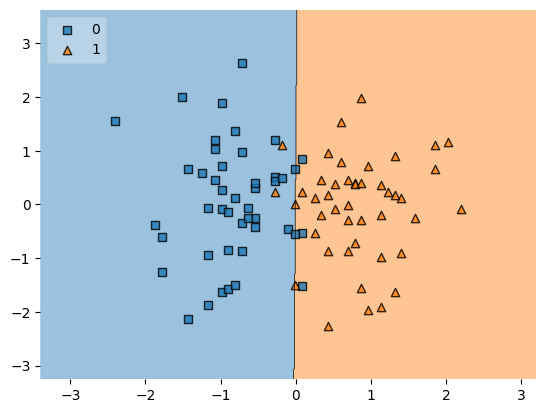

In [70]:
plot_decision_regions(X_train,y_train.values,clf=clf,legend=2)

In [71]:
import pickle

In [73]:
pickle.dump(clf,open('model.pkl','wb'))